In [358]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as ps
import plotly.figure_factory as ff
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

import statistics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Dataset

In [359]:
players_df = pd.read_csv("detailed_player_data.csv")
players_df.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,runs_conceded,catches,run_outs,maiden,stumps,match_outcome,opposition_team,strike_rate,economy,fantasy_points,venue
0,792295,RG Sharma,India,264,176,33,9,0,0,0,0,0,0,0,0,win,Sri Lanka,150.00,0.00,540,Eden Gardens
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,32,1,0,0,0,win,Zimbabwe,142.38,5.05,511,Manuka Oval
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,0,2,0,0,0,win,West Indies,142.77,0.00,505,Westpac Stadium
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,35,2,0,0,0,win,Bangladesh,190.72,5.00,480,Shere Bangla National Stadium
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,0,0,0,0,0,win,Bangladesh,157.89,0.00,456,"Zahur Ahmed Chowdhury Stadium, Chattogram"


In [360]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         52031 non-null  int64  
 1   player           52031 non-null  object 
 2   team             52031 non-null  object 
 3   runs             52031 non-null  int64  
 4   balls_faced      52031 non-null  int64  
 5   fours            52031 non-null  int64  
 6   sixes            52031 non-null  int64  
 7   wickets          52031 non-null  int64  
 8   overs_bowled     52031 non-null  int64  
 9   balls_bowled     52031 non-null  int64  
 10  runs_conceded    52031 non-null  int64  
 11  catches          52031 non-null  int64  
 12  run_outs         52031 non-null  int64  
 13  maiden           52031 non-null  int64  
 14  stumps           52031 non-null  int64  
 15  match_outcome    52031 non-null  object 
 16  opposition_team  52031 non-null  object 
 17  strike_rate 

In [361]:
players_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
match_id,52031.0,737239.521939,450090.357565,64814.0,335356.0,656443.00,1168245.0,1457469.0
runs,52031.0,19.414484,26.860869,0.0,0.0,8.00,28.0,264.0
balls_faced,52031.0,24.443159,29.620684,0.0,2.0,13.00,36.0,176.0
fours,52031.0,1.786012,2.758606,0.0,0.0,1.00,3.0,33.0
sixes,52031.0,0.335473,0.917376,0.0,0.0,0.00,0.0,16.0
wickets,52031.0,0.599104,1.021852,0.0,0.0,0.00,1.0,7.0
overs_bowled,52031.0,3.960927,4.131063,0.0,0.0,3.00,8.0,12.0
balls_bowled,52031.0,24.443159,25.420471,0.0,0.0,18.00,51.0,75.0
runs_conceded,52031.0,19.414484,21.442355,0.0,0.0,13.00,37.0,113.0
catches,52031.0,0.380312,0.678978,0.0,0.0,0.00,1.0,6.0


# Data Analysis

### 1. Batting Performance

In [362]:
bat = players_df.groupby('player')['balls_faced'].sum().reset_index()

In [363]:
batsmen = bat[bat['balls_faced'] > 0]

In [364]:
score = players_df.groupby('player')['runs'].sum().reset_index()

In [365]:
batsmen = pd.merge(batsmen, score, on='player', how='left')

In [366]:
batsmen = batsmen.rename(columns={"runs":"total_score"})

In [367]:
macthes = players_df['player'].value_counts().reset_index()

In [368]:
macthes = macthes.rename(columns={"index":"player","player":"innings"})

In [369]:
batsmen = pd.merge(batsmen, macthes, on='player', how='left')

In [370]:
batsmen['batting_avg'] = round(batsmen['total_score']/batsmen['innings'],2)

In [371]:
batsmen['strike_rate'] = round(batsmen['total_score']*100/batsmen['balls_faced'],2)

In [372]:
fs = players_df.groupby('player')['fours','sixes'].sum().reset_index()

C:\Users\sidhn\AppData\Local\Temp\ipykernel_28252\330817977.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [373]:
batsmen = pd.merge(batsmen, fs, on='player', how='left')

In [374]:
# consistency score
cs = players_df.groupby('player')['runs'].std().reset_index()

In [375]:
batsmen = pd.merge(batsmen,cs, on='player', how='left')

In [376]:
batsmen = batsmen.rename(columns={"runs":"consistency_score"})

In [377]:
# matches won 
wins = players_df[players_df['match_outcome'] == 'win'].groupby('player').size().reset_index(name = 'matches_won')

In [378]:
batsmen = pd.merge(batsmen, wins, on='player', how='left')

In [379]:
# Fill the NaN with 0 
batsmen = batsmen.fillna(0)

In [380]:
batsmen["win%"] = round(batsmen["matches_won"]*100/batsmen['innings'],2)

In [381]:
# row with max run scored of each player
mrun = players_df.loc[players_df.groupby('player')['runs'].idxmax()]

In [382]:
mrun = mrun[['player','team','runs','match_outcome','opposition_team','strike_rate']]

In [383]:
batsmen = pd.merge(batsmen, mrun, on='player', how='left')

In [384]:
batsmen = batsmen.rename(columns={"runs":"max_score","strike_rate_x":"strike_rate",
                                 "strike_rate_y":"sr_in_match"})

In [385]:
# Average fantasy points 
fp = players_df.groupby('player')['fantasy_points'].mean().reset_index()

In [386]:
batsmen = pd.merge(batsmen,fp, on='player', how='left')

In [387]:
win_score = players_df[players_df['match_outcome']=='win'].groupby('player')['runs'].sum().reset_index()

In [388]:
batsmen = pd.merge(batsmen, win_score, on='player', how='left')

In [389]:
batsmen = batsmen.rename(columns={"runs":"won_matches_score"})

In [390]:
df = batsmen.drop(columns=['consistency_score'])

In [391]:
consistency = players_df.groupby('player')['runs'].std().reset_index()

In [392]:
consistency['consistency'] = 1/(1+consistency['runs'])

In [393]:
consistency = consistency.drop(columns=['runs'])

In [394]:
batsmen = pd.merge(df,consistency, on='player',how='left')

In [395]:
batsmen = batsmen.fillna(0)

### Batsmen Consistency Analysis

Heatmap

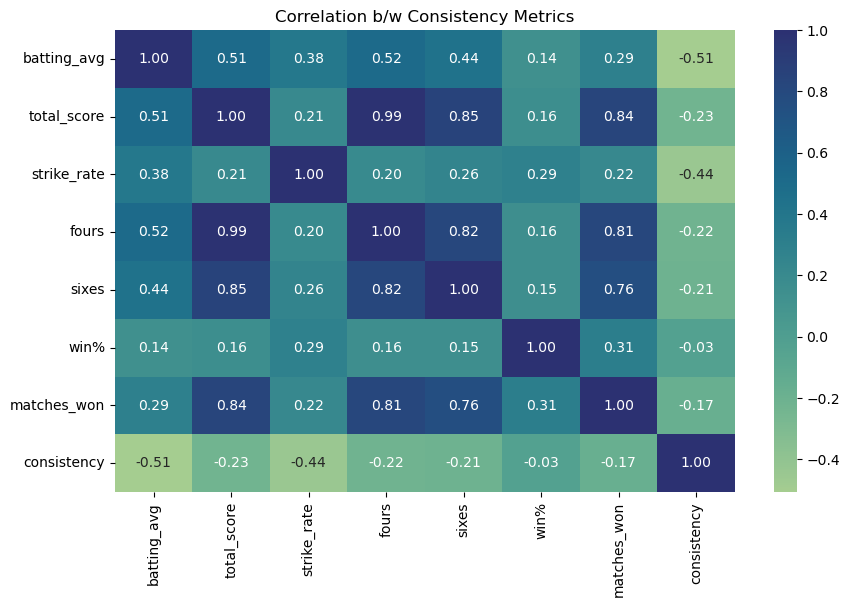

In [396]:
# select relevant columns
cts = batsmen[['batting_avg','total_score','strike_rate','fours','sixes','win%','matches_won','consistency']]

# create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cts.corr(), annot=True, cmap='crest', fmt='.2f')
plt.title("Correlation b/w Consistency Metrics")
plt.show()

#### Key Insights 

##### 1. Batting Average vs Consistency (-0.51)
- A negative correlation suggets that higher batting average does not guarantee consistency
##### 2. Total Score vs Consistency (-0.23)
- Weak negative correlation: High total runs does not necessarily indicate a conistent player
##### 3. Strike Rate vs Consistency (-0.44)
- Similar to Batting Average, higher strike rate doesn't correlate to consistency
##### 4. 4s & 6s vs Consistency (~ -0.20)
- Here also its a negative weak correlation. Explosive batters cannot always be stable
##### 5. Win% vs Consistency (-0.03)
- Almost no correlation: Teams performance impacts wins more than individual consistency
##### 6. Matches Won vs Consistency (-0.17)
- Weak Negative Correlation: Wiining matches is not directly tied to individual consistency

### K - Means Clustering
K-Means clustering can help categorize batsmen based on consistency

In [397]:
# Select features for Consistency
features = batsmen[['batting_avg','strike_rate', 'total_score', 'consistency']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
batsmen['consistency_cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



In [398]:
# Find most consistent players
consistency_cluster = batsmen.groupby('consistency_cluster')['batting_avg'].mean().idxmax()
most_consistent = batsmen[batsmen['consistency_cluster'] == consistency_cluster].reset_index()

In [399]:
most_consistent.head()

,index,player,balls_faced,total_score,innings,batting_avg,strike_rate,fours,sixes,matches_won,win%,team,max_score,match_outcome,opposition_team,sr_in_match,fantasy_points,won_matches_score,consistency,consistency_cluster
0,1,A Athanaze,378,306,13,23.54,80.95,37,6,5.0,38.46,West Indies,66,win,England,101.54,45.846154,189.0,0.041872,1
1,2,A Bagai,995,614,26,23.62,61.71,63,1,8.0,30.77,Canada,87,win,Scotland,69.60,48.961538,304.0,0.036189,1
2,3,A Balbirnie,3285,2438,78,31.26,74.22,239,29,31.0,39.74,Ireland,135,loss,West Indies,108.00,55.538462,1317.0,0.028459,1
3,8,A Flintoff,2366,2096,80,26.20,88.59,205,54,40.0,50.00,England,123,loss,West Indies,116.04,105.537500,1222.0,0.035447,1
4,9,A Flower,472,332,7,47.43,70.34,30,1,2.0,28.57,Zimbabwe,71,win,Netherlands,97.26,73.428571,110.0,0.052868,1


#### Determine the Best K (Elbow Method)

In [400]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

C:\Users\sid

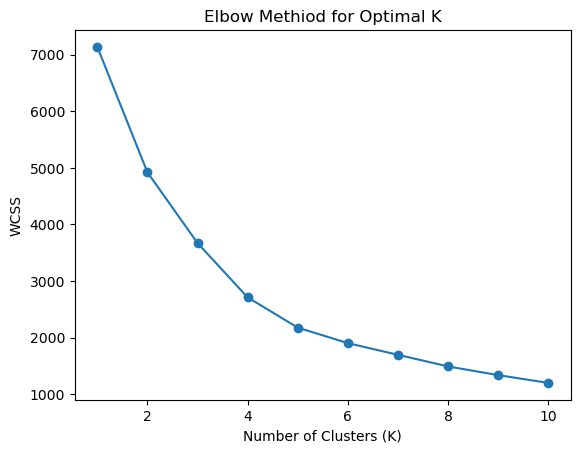

In [401]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Methiod for Optimal K")
plt.show()

#### Applying K-Means with K = 4

In [402]:
# Select features for Consistency
features = batsmen[['batting_avg','strike_rate', 'total_score', 'consistency']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
batsmen['consistency_cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



In [403]:
# Find most consistent players
consistency_cluster = batsmen.groupby('consistency_cluster')['batting_avg'].mean().idxmax()
most_consistent = batsmen[batsmen['consistency_cluster'] == consistency_cluster].reset_index()

In [404]:
most_consistent

,index,player,balls_faced,total_score,innings,batting_avg,strike_rate,fours,sixes,matches_won,win%,team,max_score,match_outcome,opposition_team,sr_in_match,fantasy_points,won_matches_score,consistency,consistency_cluster
0,29,A Symonds,4047,3589,121,29.66,88.68,304,73,91.0,75.21,Australia,151,win,Sri Lanka,117.05,77.578512,2987.0,0.029399,2
1,43,AB de Villiers,9488,9435,217,43.48,99.44,825,200,135.0,62.21,South Africa,176,win,Bangladesh,164.49,84.774194,6569.0,0.025615,2
2,49,AC Gilchrist,4260,4355,120,36.29,102.23,556,75,90.0,75.00,Australia,172,win,Zimbabwe,134.38,82.883333,3604.0,0.028291,2
3,53,AD Mathews,6934,5646,211,26.76,81.42,454,85,100.0,47.39,Sri Lanka,139,loss,India,118.80,69.018957,2422.0,0.035119,2
4,70,AJ Finch,6135,5188,140,37.06,84.56,513,118,79.0,56.43,Australia,153,win,Pakistan,106.25,71.228571,3308.0,0.025452,2
5,77,AJ Strauss,4732,3729,113,33.00,78.80,400,25,48.0,42.48,England,158,loss,India,108.97,59.415929,1883.0,0.030040,2
6,97,AN Cook,4238,3204,92,34.83,75.60,363,10,43.0,46.74,England,137,win,Pakistan,95.14,61.391304,1853.0,0.031568,2
7,208,BA Stokes,3701,3469,109,31.83,93.73,283,110,63.0,57.80,England,182,win,New Zealand,140.00,86.779817,2193.0,0.028768,2
8,213,BB McCullum,5457,5157,204,25.28,94.50,490,172,107.0,52.45,New Zealand,131,win,Pakistan,100.77,55.058824,2953.0,0.035789,2
9,233,BKG Mendis,4515,3838,127,30.22,85.01,391,64,53.0,41.73,Sri Lanka,143,win,New Zealand,110.85,58.535433,2121.0,0.031724,2


### 2. Balling Performance

In [405]:
bowlers = players_df[players_df['overs_bowled'] > 4].groupby('player')['overs_bowled'].sum().reset_index()

In [406]:
wicket = players_df.groupby('player')['wickets'].sum().reset_index(name='total_wickets')

In [407]:
bowlers = pd.merge(bowlers, wicket, on='player', how='left')

In [408]:
# runs conceded by the bowlers
rc = players_df.groupby('player')['runs_conceded'].sum().reset_index()

In [409]:
bowlers = pd.merge(bowlers, rc, on='player', how='left')

In [410]:
bowlers['bowling_avg'] = round(bowlers['runs_conceded']/bowlers['total_wickets'],2)

In [411]:
# sum of maiden overs
maiden = players_df.groupby('player')['maiden'].sum().reset_index()

In [412]:
bowlers = pd.merge(bowlers, maiden, on='player', how='left')

In [413]:
# Economy of bowlers
eco = players_df.groupby('player')['economy'].mean().reset_index()

In [414]:
bowlers = pd.merge(bowlers, eco, on='player', how='left')

In [415]:
bowlers['strike_rate'] = round((bowlers['overs_bowled']*6)/bowlers['total_wickets'],2)

In [416]:
bowlers['dot_balls%'] = round((bowlers['overs_bowled']*6-bowlers['runs_conceded'])*100/(bowlers['overs_bowled']*6),2)

In [417]:
bowlers['maiden%'] = round(bowlers['maiden']*100/bowlers['overs_bowled'],2)

In [418]:
bowlers = bowlers.fillna(0)

In [419]:
matches = players_df['player'].value_counts().reset_index()

In [420]:
matches = matches.rename(columns={"index":"player","player":"matches"})

In [421]:
bowlers = pd.merge(bowlers, matches, on='player', how='left')

In [422]:
bowlers['wicket_per_match'] = round(bowlers['total_wickets']/bowlers['matches'],2)

In [423]:
# Calculating Standard Deviation of Wicket per Match
wicket_std = statistics.stdev(players_df.groupby('player')['wickets'].sum()/players_df.groupby('player')['match_id'].count())

In [424]:
bowlers['consistency'] = round((bowlers['wicket_per_match']/wicket_std)+(1/bowlers['economy']),2)

In [425]:
bowlers.replace([np.inf,-np.inf],0, inplace=True)

In [426]:
bowlers

,player,overs_bowled,total_wickets,runs_conceded,bowling_avg,maiden,economy,strike_rate,dot_balls%,maiden%,matches,wicket_per_match,consistency
0,A Ashok,10,1,65,65.00,1,9.150000,60.00,-8.33,10.00,2,0.50,0.88
1,A Bohara,9,0,51,0.00,2,5.360000,0.00,5.56,22.22,2,0.00,0.19
2,A Codrington,24,6,153,25.50,4,5.448333,24.00,-6.25,16.67,6,1.00,1.73
3,A Dananjaya,325,50,1682,33.64,8,5.021842,39.00,13.74,2.46,38,1.32,2.24
4,A Dutt,341,46,1667,36.24,29,5.031136,44.48,18.52,8.50,44,1.05,1.82
5,A Flintoff,595,116,2421,20.87,74,3.531625,30.78,32.18,12.44,80,1.45,2.53
6,A Kumble,234,26,1055,40.58,11,4.385926,54.00,24.86,4.70,27,0.96,1.71
7,A Martin,70,9,293,32.56,5,3.727000,46.67,30.24,7.14,10,0.90,1.66
8,A McGrath,31,3,143,47.67,3,2.027857,62.00,23.12,9.68,14,0.21,0.82
9,A Mishra,294,53,1382,26.08,21,4.420312,33.28,21.66,7.14,32,1.66,2.79


### Bowlers Consistency Analysis

HeatMap

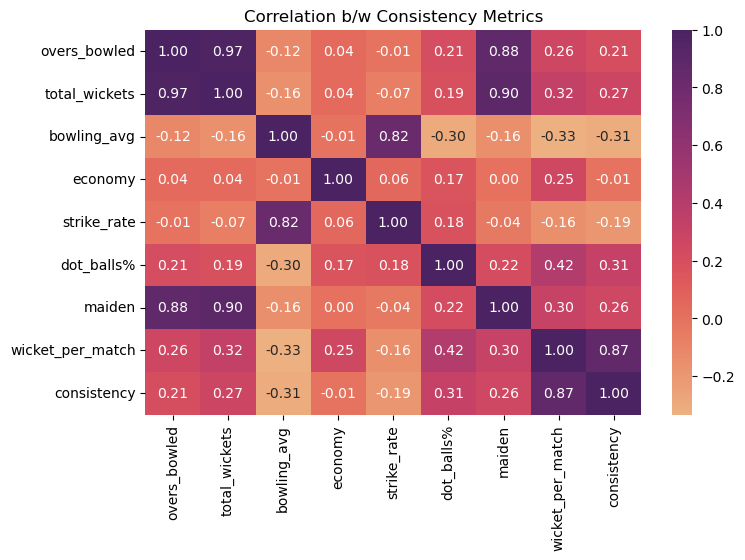

In [427]:
# select relevant columns
cts = bowlers[['overs_bowled','total_wickets','bowling_avg','economy','strike_rate','dot_balls%','maiden','wicket_per_match','consistency']]

# create a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cts.corr(), annot=True, cmap='flare', fmt='.2f')
plt.title("Correlation b/w Consistency Metrics")
plt.show()

#### Key Observations
##### 1. Wicket per Match vs Conistency (0.87)
- Strong Positive Correaltion: bowlers who take more wickets per match tend to be higly consistent
##### 2. Bowling Avg vs Consistency (-0.31)
- Slight Negative Correlation: lower a bowling averahe (fewer runs per wicket) indicates slightly more consistency
##### 3. Strike Rate vs Consistency (-0.19)
- Weak Negative Correlation: bowler with lower strike rate (fewer balls per wicket) are merely conistent
##### 4. Dot Balls% vs Consistency (0.31) 
- Slight Positive Correlation: bowlers who bowl more dot balls tend to be slightly more consistent
- Almost same correlation can be seen with Maiden Overs (0.26) and Total Wickets (0.27)
##### 5. Economy vs Consistency (-0.01)
- No Correlation: Indicates that economy rate alone does not determine a bowler's consistency

### K-Means Clustering

In [428]:
# Select features for Consistency
features = bowlers[['wicket_per_match','bowling_avg','strike_rate','dot_balls%','maiden','total_wickets',
                    'economy','consistency']]

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
bowlers['consistency_cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



In [429]:
# Find most consistent players
consistency_cluster = bowlers.groupby('consistency_cluster')['bowling_avg'].mean().idxmax()
most_consistent_bowlers = bowlers[bowlers['consistency_cluster'] == consistency_cluster].reset_index()

#### Elbow method (To determine better K)

In [431]:
bcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(features_scaled)
    bcss.append(kmeans.inertia_)

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\sid

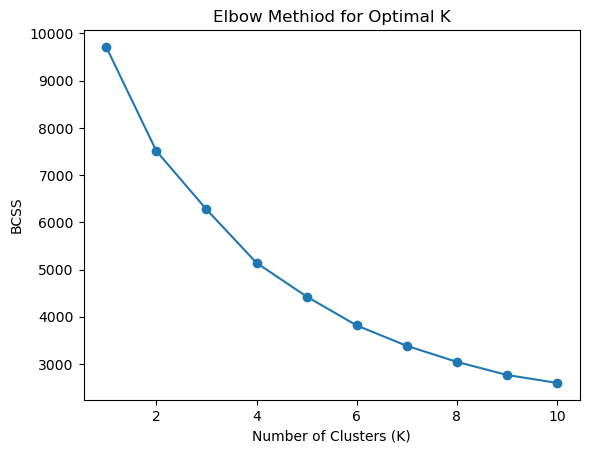

In [432]:
plt.plot(range(1,11), bcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("BCSS")
plt.title("Elbow Methiod for Optimal K")
plt.show()

#### Applying K-Means with K = 4

In [433]:
# Select features for Consistency
features = bowlers[['wicket_per_match','bowling_avg','strike_rate','dot_balls%','maiden','total_wickets',
                    'economy','consistency']]


# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
bowlers['consistency_cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sidhn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



In [436]:
# Find most consistent bowlers
consistency_cluster = bowlers.groupby('consistency_cluster')['bowling_avg'].mean().idxmax()
most_consistent_bowlers = bowlers[bowlers['consistency_cluster'] == consistency_cluster].reset_index()

In [438]:
most_consistent_bowlers

,index,player,overs_bowled,total_wickets,runs_conceded,bowling_avg,maiden,economy,strike_rate,dot_balls%,maiden%,matches,wicket_per_match,consistency,consistency_cluster
0,0,A Ashok,10,1,65,65.00,1,9.150000,60.00,-8.33,10.00,2,0.50,0.88,2
1,12,A Ndlovu,17,1,77,77.00,0,4.610000,102.00,24.51,0.00,2,0.50,0.99,2
2,23,A van der Merwe,17,1,79,79.00,2,3.913333,102.00,22.55,11.76,3,0.33,0.77,2
3,24,AA Donald,25,1,127,127.00,2,5.290000,150.00,15.33,8.00,3,0.33,0.70,2
4,34,AC Dawson,37,1,201,201.00,1,4.540000,222.00,9.46,2.70,6,0.17,0.48,2
5,65,AP Devcich,42,4,276,69.00,1,4.679231,63.00,-9.52,2.38,13,0.31,0.69,2
6,73,AS Hansra,26,2,277,138.50,1,5.748667,78.00,-77.56,3.85,15,0.13,0.38,2
7,81,Aamer Yamin,26,2,147,73.50,1,5.305000,78.00,5.77,3.85,4,0.50,0.96,2
8,97,Aftab Ahmed,41,4,361,90.25,0,2.069273,61.50,-46.75,0.00,55,0.07,0.59,2
9,106,Akif Raja,38,3,154,51.33,6,3.256667,76.00,32.46,15.79,6,0.50,1.08,2
